In [94]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import imblearn
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE


from sklearn.utils.multiclass import type_of_target
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [95]:
train = pd.read_csv('train.gz')

print(train.head())

             id  click      hour    C1  banner_pos   site_id site_domain  \
0  1.000009e+18      0  14102100  1005           0  1fbe01fe    f3845767   
1  1.000017e+19      0  14102100  1005           0  1fbe01fe    f3845767   
2  1.000037e+19      0  14102100  1005           0  1fbe01fe    f3845767   
3  1.000064e+19      0  14102100  1005           0  1fbe01fe    f3845767   
4  1.000068e+19      0  14102100  1005           1  fe8cc448    9166c161   

  site_category    app_id app_domain  ... device_type device_conn_type    C14  \
0      28905ebd  ecad2386   7801e8d9  ...           1                2  15706   
1      28905ebd  ecad2386   7801e8d9  ...           1                0  15704   
2      28905ebd  ecad2386   7801e8d9  ...           1                0  15704   
3      28905ebd  ecad2386   7801e8d9  ...           1                0  15706   
4      0569f928  ecad2386   7801e8d9  ...           1                0  18993   

   C15  C16   C17  C18  C19     C20  C21  
0  320   50  

In [96]:
#Narrowing down the data to one site
train['site_id'].value_counts()[train['site_id'].value_counts()< 500000]

a7853007    461311
b7e9786d    369099
5ee41ff2    349008
6399eda6    343703
5bcf81a2    340050
             ...  
c7722f88         1
d92a5e9b         1
178661e3         1
7e5b4c36         1
0849db33         1
Name: site_id, Length: 4730, dtype: int64

In [97]:
train=train.loc[train['site_id'] == 'a7853007']

In [98]:
#clean up training data
train = train.dropna(axis=0)
x = train.drop(['id','click',
                'site_id', 'site_domain', 'site_category',      
'app_id',             
'app_domain',         
'app_category',       
'device_id',         
'device_ip',          
'device_model'],axis=1)

y = train.iloc[:,1]

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, stratify=y, random_state=4)

In [100]:
oversample = SMOTE()

x_train, y_train = oversample.fit_resample(x_train, y_train)

counter = Counter(y_train)
print(counter)

Counter({0: 331298, 1: 331298})


In [101]:
#checking to see the resampling is done correctly
np.unique(y_train, return_counts=True)

(array([0, 1]), array([331298, 331298]))

LR: 0.534873 (0.002184)
LDA: 0.542838 (0.000475)
KNN: 0.508679 (0.000796)
CART: 0.553653 (0.000515)
NB: 0.534668 (0.000286)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


SVC: 0.500000 (0.000003)
RF: 0.553954 (0.000914)


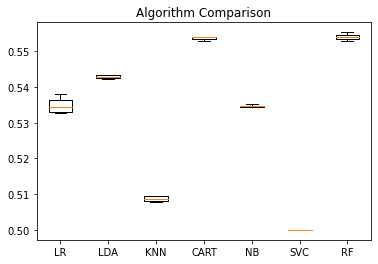

In [102]:
#Reused from Premier League project

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', LinearSVC()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=4, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [103]:
#Testing each of the models to see which is the most accurate on our test data

#Decision Tree Classifier
cart = DecisionTreeClassifier()
cart.fit(x_train, y_train)
y_pred_cart = cart.predict(x_test)

print("Accuracy Score:", accuracy_score(y_test,y_pred_cart))
print("F1 Score:", f1_score(y_test,y_pred_cart))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_cart))

Accuracy Score: 0.5283374700584199
F1 Score: 0.19839003813067585
ROC-AUC Score: 0.547045651711294


In [104]:
#Random Forest
clf =RandomForestClassifier()
clf.fit(x_train, y_train)
y_pred_clf = clf.predict(x_test)

print("Accuracy Score:", accuracy_score(y_test,y_pred_clf))
print("F1 Score:", f1_score(y_test,y_pred_clf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_clf))

Accuracy Score: 0.5300933201825218
F1 Score: 0.19868773680805843
ROC-AUC Score: 0.54755421229065


In [105]:
#LDA
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
y_pred_lda = lda.predict(x_test)
print(y_pred_lda)


print("Accuracy Score:", accuracy_score(y_test,y_pred_lda))
print("F1 Score:", f1_score(y_test,y_pred_lda))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_lda))

[1 1 0 ... 1 1 1]
Accuracy Score: 0.4054279613712973
F1 Score: 0.19577487502015803
ROC-AUC Score: 0.5392351877923868


In [106]:
#Logistic Regression
Lr = LogisticRegression()
Lr.fit(x_train,y_train)
y_pred_lr=Lr.predict(x_test)
print(y_pred_lr)


print("Accuracy Score:", accuracy_score(y_test,y_pred_lr))
print("F1 Score:", f1_score(y_test,y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_lr))

[1 1 0 ... 1 1 1]
Accuracy Score: 0.35681692552810984
F1 Score: 0.1944014552958106
ROC-AUC Score: 0.5348322913446533


In [107]:
#SVC
svc = LinearSVC()
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)
print(y_pred_svc)

print("Accuracy Score:", accuracy_score(y_test,y_pred_svc))
print("F1 Score:", f1_score(y_test,y_pred_svc))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_svc))

[1 1 1 ... 1 1 1]
Accuracy Score: 0.10229452760044655
F1 Score: 0.1856028947601302
ROC-AUC Score: 0.5


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [108]:
#Gaussian
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)
print(y_pred_nb)

print("Accuracy Score:", accuracy_score(y_test,y_pred_nb))
print("F1 Score:", f1_score(y_test,y_pred_nb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_nb))

[1 1 0 ... 1 1 1]
Accuracy Score: 0.2985161982593239
F1 Score: 0.1937991255496456
ROC-AUC Score: 0.5314163818235931


In [109]:
cross_val_score(cart, x_train, y_train, cv=5)

array([0.5539013 , 0.55280375, 0.55413941, 0.55426014, 0.55578445])

In [110]:
print(metrics.classification_report(y_pred_cart, y_test))

              precision    recall  f1-score   support

           0       0.52      0.91      0.67     47414
           1       0.57      0.12      0.20     44849

    accuracy                           0.53     92263
   macro avg       0.55      0.52      0.43     92263
weighted avg       0.55      0.53      0.44     92263



In [111]:
#Finding the best parameters for our best performing model
param_dict = {
    "criterion": ['gini', 'entropy'],
    "max_depth": range(-1,10),
    "min_samples_split": range(-1,10),
    "min_samples_leaf": range(-1,5)
}

In [112]:
grid = GridSearchCV(cart,
                   param_grid=param_dict,
                   cv=10,
                   verbose=1,
                   n_jobs=-1,
                   refit = True,
                   scoring='accuracy')
grid.fit(x_train, y_train)

Fitting 10 folds for each of 1452 candidates, totalling 14520 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.55089226 0.55089679 0.55088773]
  warnings.warn(


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(-1, 10),
                         'min_samples_leaf': range(-1, 5),
                         'min_samples_split': range(-1, 10)},
             scoring='accuracy', verbose=1)

In [113]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 7}

In [114]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=2,
                       min_samples_split=7)

In [115]:
grid.best_score_

0.5509013128410323

In [116]:
from sklearn.model_selection import RandomizedSearchCV
random = RandomizedSearchCV(cart,
                   param_distributions=param_dict,
                   cv=10,
                   verbose=1,
                   n_jobs=-1,
                   scoring='accuracy')
random.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.5412695  0.5412695  0.55083793        nan 0.55040478
        nan        nan        nan        nan]
  warnings.warn(


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(-1, 10),
                                        'min_samples_leaf': range(-1, 5),
                                        'min_samples_split': range(-1, 10)},
                   scoring='accuracy', verbose=1)

In [117]:
random.best_params_

{'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_depth': 9,
 'criterion': 'gini'}

In [118]:
random.best_estimator_

DecisionTreeClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=4)

In [119]:
random.best_score_

0.5508379262279695

In [133]:
cart2 = grid.best_estimator_
cart2.fit(x_train, y_train)
y_pred_cart2 = cart2.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test,y_pred_cart2))
print("F1 Score:", f1_score(y_test,y_pred_cart2))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_cart2))

Accuracy Score: 0.4666334283515602
F1 Score: 0.19876909049464325
ROC-AUC Score: 0.5464282293637726


In [147]:
y_random = random.best_estimator_.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test,y_grid))
print("F1 Score:", f1_score(y_test,y_grid))
print("ROC-AUC Score:", roc_auc_score(y_test, y_grid))

Accuracy Score: 0.4666334283515602
F1 Score: 0.19876909049464325
ROC-AUC Score: 0.5464282293637726


In [142]:
print(metrics.classification_report(y_pred_cart2, y_test))

              precision    recall  f1-score   support

           0       0.45      0.92      0.60     40283
           1       0.65      0.12      0.20     51980

    accuracy                           0.47     92263
   macro avg       0.55      0.52      0.40     92263
weighted avg       0.56      0.47      0.37     92263



In [145]:
print(metrics.classification_report(y_random, y_test))

              precision    recall  f1-score   support

           0       0.45      0.92      0.60     40282
           1       0.65      0.12      0.20     51981

    accuracy                           0.47     92263
   macro avg       0.55      0.52      0.40     92263
weighted avg       0.56      0.47      0.37     92263

